In [20]:
#importing libraries
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [18]:
a=load_iris()
a.keys()
a1=a.data
x=pd.DataFrame(a1,columns=a.feature_names)
y=x[['petal length (cm)','petal width (cm)']]
y

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


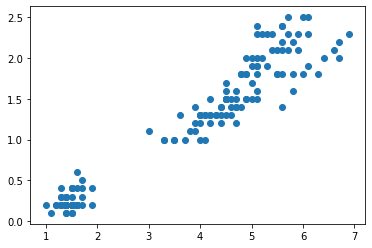

In [19]:
plt.scatter(y['petal length (cm)'],y['petal width (cm)'])

In [38]:
#Elbow Method: to find the number of clusters by watching at acatter plot
#inertia_ : it represnts  the sum of squared errors
z=range(1,11)
sse=[]
for i in z:
    x1=KMeans(n_clusters=i).fit(y)
    sse.append(x1.inertia_)
    
sse

[650.7886666666667,
 186.2797029114676,
 31.371358974358976,
 22.646545454545457,
 14.200320553539019,
 11.489954545454545,
 9.281343349632824,
 7.8055473684210535,
 6.860070903812391,
 6.200777938435833]

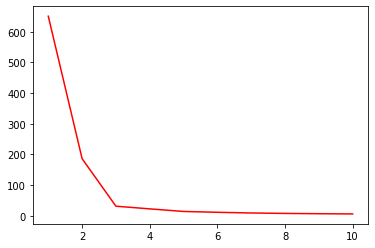

In [39]:
#efficiently it has last bend at 3, so it has 3 clusters
plt.plot(z,sse,c='red')

In [26]:
f1=KMeans(n_clusters=3)
f2=f1.fit_predict(y)
y['clusters']=f2
y

C:\Users\srinivas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,petal length (cm),petal width (cm),clusters
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [41]:
#finding the centroids of the clustres
ss=f1.cluster_centers_
ss

array([[4.26923077e+00, 1.34230769e+00, 1.00000000e+00],
       [1.46200000e+00, 2.46000000e-01, 4.44089210e-16],
       [5.59583333e+00, 2.03750000e+00, 2.00000000e+00]])

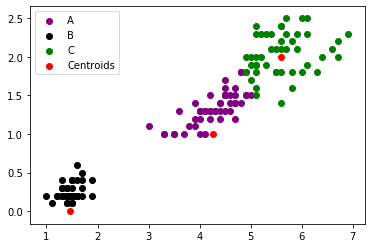

In [42]:
y1=y[y['clusters']==0]
y2=y[y['clusters']==1]
y3=y[y['clusters']==2]

plt.scatter(y1['petal length (cm)'],y1['petal width (cm)'],c='purple',label='A')
plt.scatter(y2['petal length (cm)'],y2['petal width (cm)'],c='black',label='B')
plt.scatter(y3['petal length (cm)'],y3['petal width (cm)'],c='green',label='C')
plt.scatter(ss[:,0],ss[:,2],c='red',label='Centroids')
plt.legend()